In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Regression Dataset - Quadratic

Input feature: X
    
Target: 5x^2 - 23x + 47 + some noise
    
Objective: Train a model to predict target for a given x

In [2]:
# Quadratic function

def quad_func(x):
    return 5*x**2 - 23*x

In [3]:
quad_func(25)

2550

In [4]:
quad_func(1.254)

-20.979419999999998

In [5]:
np.random.seed(5)

x = pd.Series(np.arange(-20,21,0.2))
x.count()

205

In [6]:
y = x.map(quad_func) + np.random.randn(len(x))*30
y.count()

205

In [7]:
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-20.0,2473.236825
1,-19.8,2405.673895
2,-19.6,2444.523136
3,-19.4,2320.437236
4,-19.2,2288.088295


In [8]:
# Correlation will indicate how strongly features are related

df.corr()

,x,y
x,1.000000,-0.339751
y,-0.339751,1.000000


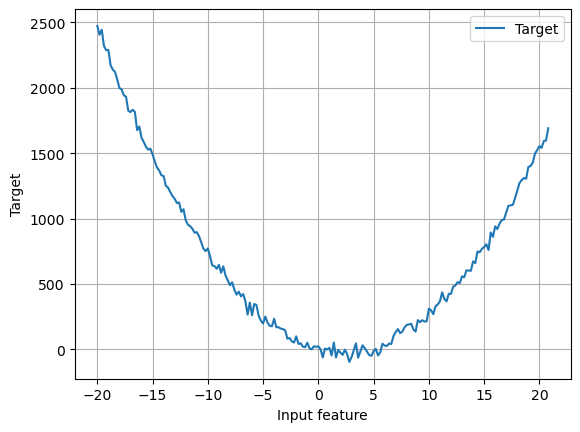

In [9]:
plt.plot(df.x, df.y, label='Target')
plt.grid()
plt.xlabel('Input feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [10]:
# Save all data
df.to_csv('quadratic_all.csv',index=False, columns=['x','y'])

### SageMaker convention for Training and Validation files

CSV File Column order: y_noisy, x

Training, Validation files do not have column header

In [13]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the data

np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [14]:
df.head()

,x,y
154,10.8,343.968005
21,-15.8,1585.894405
198,19.6,1497.303317
48,-10.4,769.909912
34,-13.2,1173.230755


In [22]:
rows = df.shape[0]
train = int(rows * 0.7)
test = rows - train

In [23]:
rows, train, validation

(205, 143, 62)

In [24]:
df[:train].head()

,x,y
154,10.8,343.968005
21,-15.8,1585.894405
198,19.6,1497.303317
48,-10.4,769.909912
34,-13.2,1173.230755


In [25]:
# Training data
df[:train].to_csv('quadratic_train.csv',index=False, header=False, columns=['y','x'])


In [26]:
# Validation data
df[train:].to_csv('quadratic_validation.csv', index=False, header=False, columns=['y','x'])